In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('bnb_processed_data.xlsx')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1914,2024-05-27,599.825928,613.388184,599.700745,603.526428,603.526428,1691663828
1915,2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
1916,2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
1917,2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745


In [2]:
# 3. Chia train test validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = len(df) - train_size
train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 4. Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

In [4]:
# 5. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


In [5]:
# 6. Training process
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 7. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [7]:
# 8. Evaluate model accuracy with RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Testing RMSE: {test_rmse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing MAPE: {test_mape}%")

Testing RMSE: 250.67595369212677
Testing MAE: 231.03539119987232
Testing MAPE: 86.54983864161932%


In [8]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# Create a new dataframe with the predicted closing prices
df_next_30_days = pd.DataFrame(y_next_30_days, index=last_30_data, columns=['Close'])

# Print the dataframe
print(df_next_30_days)

#Quá trình tạo index predict 60 ngày tiếp theo
last_index = last_30_data[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Create a new dataframe with the predicted closing prices
df_next_60_days = pd.DataFrame(y_next_60_days, index=last_60_data, columns=['Close'])

# Print the dataframe
print(df_next_60_days)

#Quá trình tạo index predict 90 ngày tiếp theo
last_index = last_60_data[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# Create a new dataframe with the predicted closing prices
df_next_90_days = pd.DataFrame(y_next_90_days, index=last_90_data, columns=['Close'])

# Print the dataframe
print(df_next_90_days)




Predicted closing prices for the next 30 days:
[662.46290078 662.8417489  663.22059703 663.59944515 663.97829327
 664.35714139 664.73598952 665.11483764 665.49368576 665.87253388
 666.25138201 666.63023013 667.00907825 667.38792637 667.76677449
 668.14562262 668.52447074 668.90331886 669.28216698 669.66101511
 670.03986323 670.41871135 670.79755947 671.1764076  671.55525572
 671.93410384 672.31295196 672.69180009 673.07064821 673.44949633]
           Close
1918  662.462901
1919  662.841749
1920  663.220597
1921  663.599445
1922  663.978293
1923  664.357141
1924  664.735990
1925  665.114838
1926  665.493686
1927  665.872534
1928  666.251382
1929  666.630230
1930  667.009078
1931  667.387926
1932  667.766774
1933  668.145623
1934  668.524471
1935  668.903319
1936  669.282167
1937  669.661015
1938  670.039863
1939  670.418711
1940  670.797559
1941  671.176408
1942  671.555256
1943  671.934104
1944  672.312952
1945  672.691800
1946  673.070648
1947  673.449496
Predicted closing prices for 

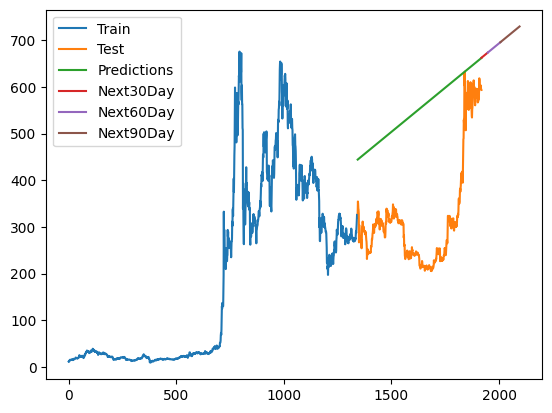

In [9]:
#Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()